# Libro de descarga de la base de datos
Este libro ejecuta los comandos de descarga, y transforma el conjunto de datos en un .csv para tratarlos posteriormente.

In [2]:
from traffic.data import opensky  # se importan los recursos que se van a usar
                                  # de la librería

In [4]:
import os # libreria para acceder a archivos de sistema

carpeta_datos_csv = r"datos_sectores/"  # nombre de la carpeta

def guardarcsv(archivo, nombre_archivo,carpeta_datos_csv = carpeta_datos_csv):
    # esta funciona genera una carpeta sino existe, y guarda los datos descargados en esta
    if not os.path.exists(carpeta_datos_csv):
        os.mkdir(carpeta_datos_csv)
    # guarda el archivo .csv en la carpeta especificada
    carpeta_datos_csv = r"datos_sectores/"
    archivo.to_csv(carpeta_datos_csv+nombre_archivo+".csv")

In [24]:
flight = opensky.history(
    "2017-02-05",
    # stop is implicit, i.e. stop="2017-02-06"
    callsign="EZY158T",
    return_flight=True
)

In [26]:
guardarcsv(flight,"datos_prueba",carpeta_datos_csv)

In [27]:
flight.data.head()

,alert,altitude,callsign,geoaltitude,groundspeed,hour,icao24,last_position,latitude,longitude,onground,spi,squawk,timestamp,track,vertical_rate
0,False,1200.0,EZY158T,725.0,154.0,2017-02-05 15:00:00+00:00,406d95,2017-02-05 15:08:14.617999872+00:00,48.724503,2.329665,False,False,1000,2017-02-05 15:08:15+00:00,241.774666,2816.0
1,False,1250.0,EZY158T,725.0,154.0,2017-02-05 15:00:00+00:00,406d95,2017-02-05 15:08:15.714999808+00:00,48.724136,2.328538,False,False,1000,2017-02-05 15:08:16+00:00,241.774666,2816.0
2,False,1300.0,EZY158T,825.0,153.0,2017-02-05 15:00:00+00:00,406d95,2017-02-05 15:08:16.647999744+00:00,48.723862,2.327763,False,False,1000,2017-02-05 15:08:17+00:00,241.598104,2944.0
3,False,1350.0,EZY158T,850.0,153.0,2017-02-05 15:00:00+00:00,406d95,2017-02-05 15:08:17.642000128+00:00,48.723450,2.326637,False,False,1000,2017-02-05 15:08:18+00:00,241.598104,2944.0
4,False,1400.0,EZY158T,900.0,154.0,2017-02-05 15:00:00+00:00,406d95,2017-02-05 15:08:18.152000256+00:00,48.723312,2.326214,False,False,1000,2017-02-05 15:08:19+00:00,241.774666,2944.0


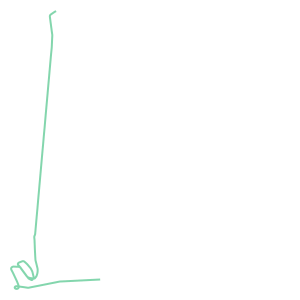

In [28]:
flight

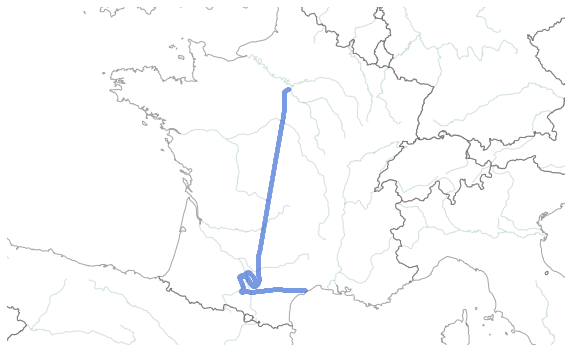

In [35]:
import matplotlib.pyplot as plt
from traffic.drawing import EuroPP, PlateCarree, countries, rivers
with plt.style.context('traffic'):
    fig, ax = plt.subplots(
        subplot_kw=dict(projection=EuroPP())
    )
    ax.add_feature(countries())
    ax.add_feature(rivers())
    ax.set_extent((-7, 13, 42, 50))

    # no specific method for that in traffic
    # but switch back to pandas DataFrame for manual plot
    flight.data.plot.scatter(
            ax=ax, x='longitude', y='latitude',
            transform=PlateCarree(), s=5, cmap='viridis'
    )